In [1]:
!pip install scikit-image

In [2]:
import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
import numpy as np

coins = coins()

In [3]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [4]:
coins.shape

(303, 384)

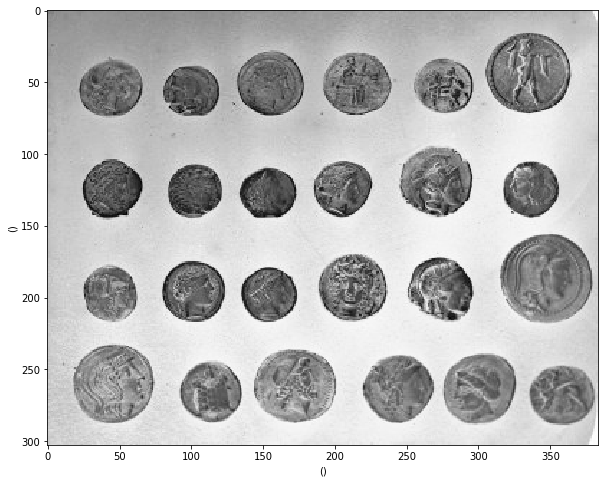

In [5]:
plt.figure(figsize=(10,8))
plt.imshow(coins, cmap='Greys')

plt.xlabel(())
plt.ylabel(())

plt.show()

In [7]:
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale

In [8]:
smoothened_coins = gaussian_filter(coins, sigma=2)

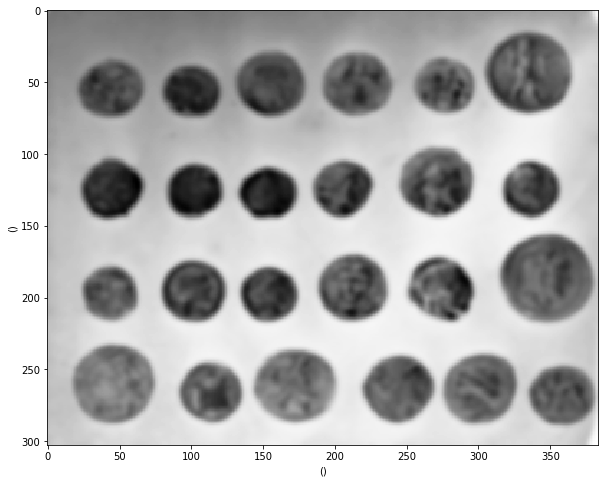

In [9]:
plt.figure(figsize=(10,8))
plt.imshow(smoothened_coins, cmap='Greys')

plt.xlabel(())
plt.ylabel(())

plt.show()

In [10]:
rescaled_coins = rescale(smoothened_coins, 0.2, mode = "reflect", anti_aliasing = True, multichannel=False)

In [11]:
rescaled_coins.shape

(61, 77)

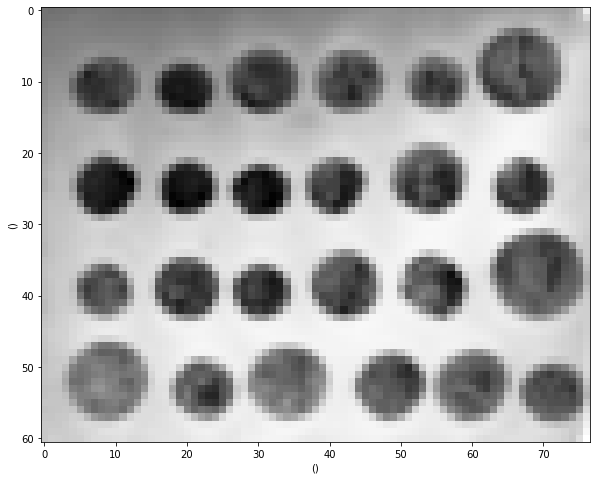

In [12]:
plt.figure(figsize=(10,8))
plt.imshow(rescaled_coins, cmap='Greys')

plt.xlabel(())
plt.ylabel(())

plt.show()

In [13]:
n_clusters = 10

In [16]:
x = np.reshape(rescaled_coins, (-1, 1))

x.shape

(4697, 1)

In [18]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'average')

ac.fit(x)

AgglomerativeClustering(linkage='average', n_clusters=10)

In [19]:
ac.labels_

array([2, 2, 2, ..., 1, 0, 9], dtype=int64)

In [20]:
labels = np.reshape(ac.labels_, rescaled_coins.shape)

labels.shape

(61, 77)

In [21]:
unique_labels = np.unique(labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

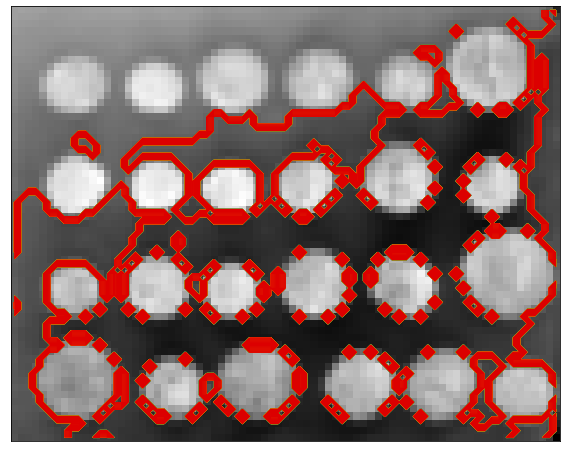

In [23]:
plt.figure(figsize=(10,8))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels == 1, colors=[plt.cm.nipy_spectral(l/float(n_clusters))])
    
    
plt.xticks(())
plt.yticks(())

plt.show()

In [24]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*rescaled_coins.shape)

connectivity.shape

(4697, 4697)

In [25]:
n_clusters = 27

In [26]:
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'ward', connectivity=connectivity)

ward.fit(x)

AgglomerativeClustering(connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>,
                        n_clusters=27)

In [28]:
labels = np.reshape(ward.labels_, rescaled_coins.shape)

In [29]:
unique_labels = np.unique(labels)

print("Numbers of clusters: ", unique_labels)

Numbers of clusters:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


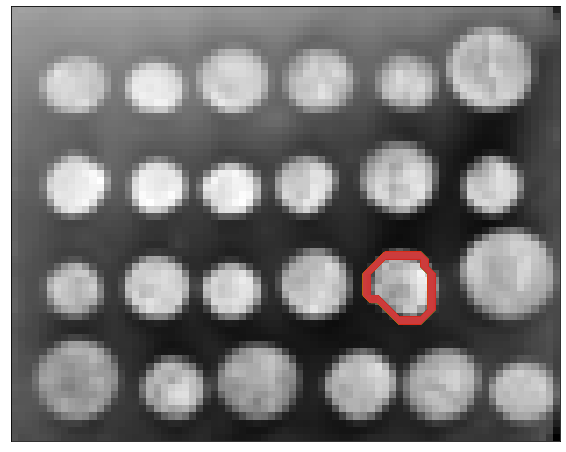

In [32]:
plt.figure(figsize=(10,8))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels == 1, colors=[plt.cm.nipy_spectral(l/float(n_clusters))])
    
    
plt.xticks(())
plt.yticks(())

plt.show()